In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [9]:
y = np.random.randn(1000)

In [10]:
fft_y = np.fft.fft(y)

In [11]:
ifft_y = np.copy(fft_y)
ifft_y[450:-450] = 0

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


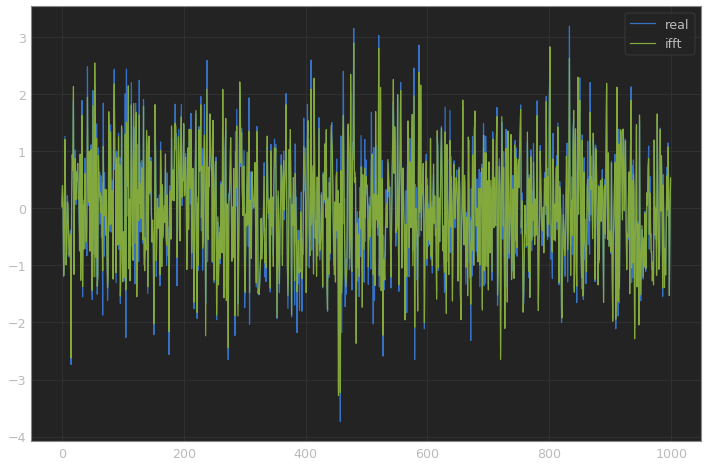

In [12]:
plt.plot(y, label="real")
plt.plot(np.fft.ifft(ifft_y), label="ifft")
plt.legend()

In [13]:
x = np.linspace(-3, 3, 300)
y = np.abs(x[:100]) - .5
y = np.concatenate((y, np.power(x[100:-100], 2) * .5))
y = np.concatenate((y, np.abs(x[-100:]) - .5))

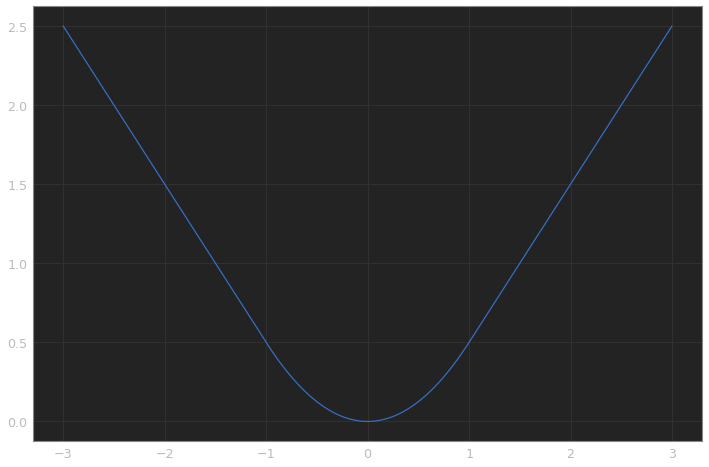

In [8]:
plt.plot(x, y)